### Packages

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns
import copy
import datetime

from sklearn.metrics import mean_squared_error
from math import sqrt
from statistics import mean
import math

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv("data/train_E1GspfA.csv")
valid_data = pd.read_csv("data/test_6QvDdzb.csv")

In [3]:
print(train_data.shape)
train_data.head()

(18247, 3)


,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  int64 
 2   demand  18247 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 427.8+ KB


### Performing Exploratory Data Analysis(EDA)

In [5]:
eda_df=copy.deepcopy(train_data)

In [6]:
eda_df['date']=pd.to_datetime(eda_df['date'],format="%Y-%m-%d")

In [7]:
eda_df['day']=eda_df['date'].dt.day
eda_df['month']=eda_df['date'].dt.month
eda_df['year']=eda_df['date'].dt.year

In [8]:
eda_df.head()

,date,hour,demand,day,month,year
0,2018-08-18,9,91,18,8,2018
1,2018-08-18,10,21,18,8,2018
2,2018-08-18,13,23,18,8,2018
3,2018-08-18,14,104,18,8,2018
4,2018-08-18,15,81,18,8,2018


### Yearly Demand

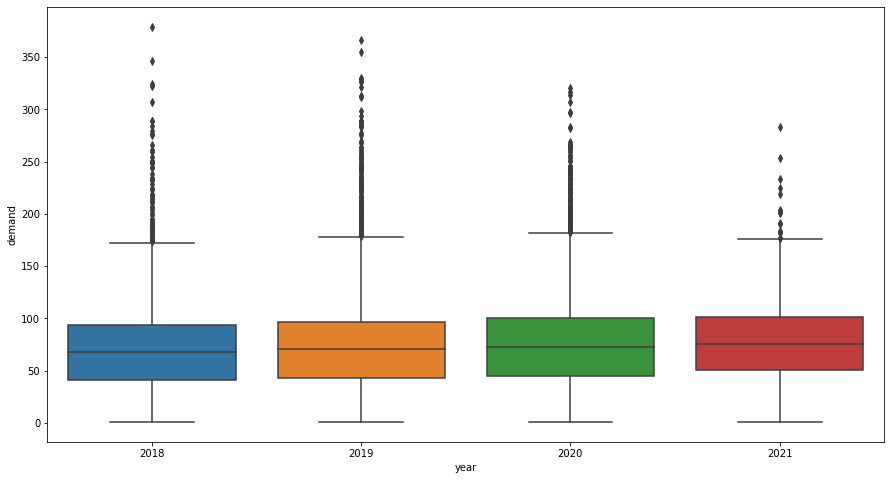

In [9]:
plt.figure(figsize=(15,8))
sns.boxplot(eda_df['year'],eda_df['demand'])
plt.show()

In [10]:
eda_df.groupby('year').demand.median()

year
2018    68
2019    71
2020    73
2021    76
Name: demand, dtype: int64

### Median price is almost same for all the years

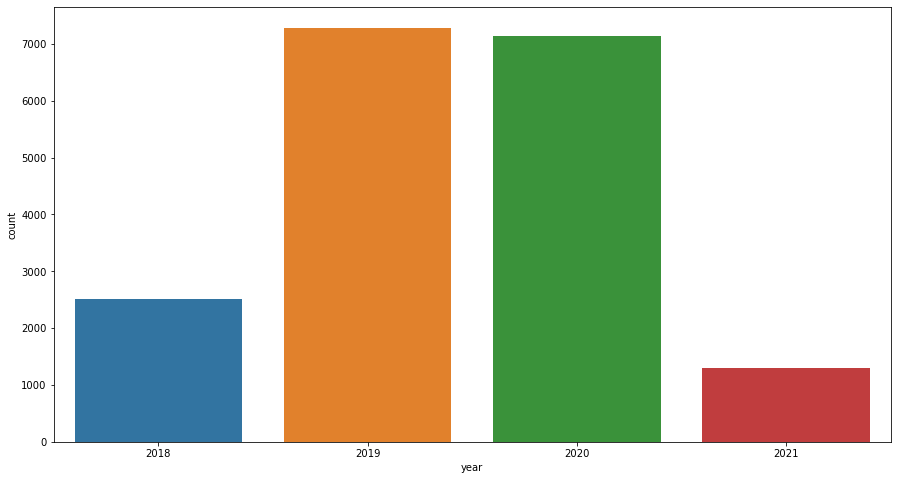

In [11]:
plt.figure(figsize=(15,8))
sns.countplot(eda_df['year'])
plt.show()

### Monthly demand

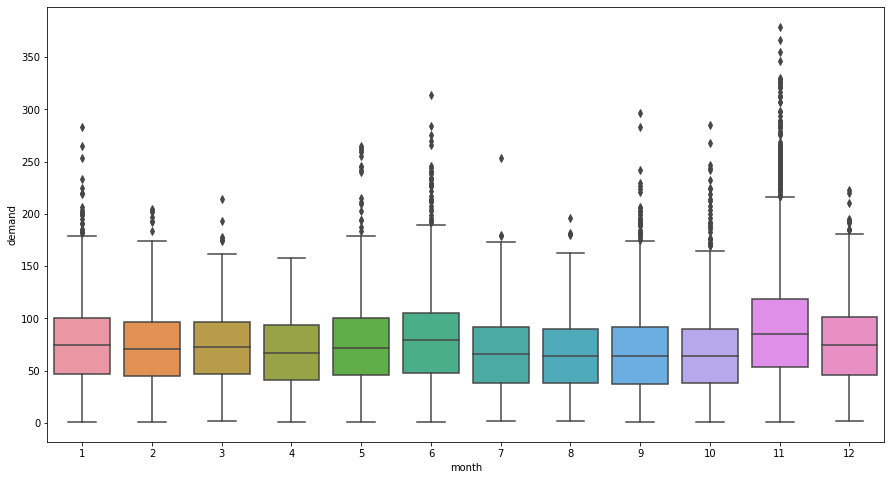

In [12]:
plt.figure(figsize=(15,8))
sns.boxplot(eda_df['month'],eda_df['demand'])
plt.show()

In [13]:
eda_df.groupby('month').demand.median().sort_values(ascending=False)

month
11    85
6     79
1     75
12    75
3     73
5     72
2     71
4     67
7     66
8     64
9     64
10    64
Name: demand, dtype: int64

### Nov month has the highest demand

### Daily Trend

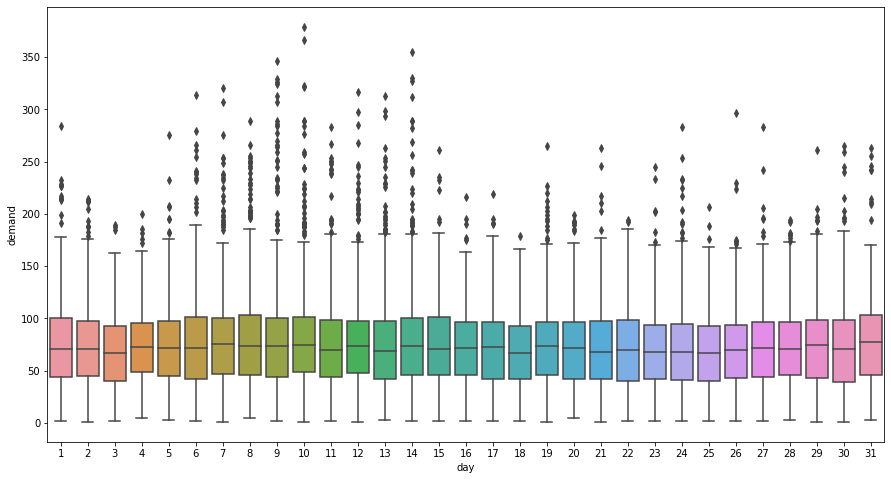

In [14]:
plt.figure(figsize=(15,8))
sns.boxplot(eda_df['day'],eda_df['demand'])
plt.show()

In [15]:
eda_df.groupby('day').demand.median().sort_values(ascending=False)

day
31    77.5
7     76.0
29    75.0
10    75.0
14    74.0
8     74.0
12    74.0
9     73.5
19    73.5
4     73.0
17    72.5
27    72.0
20    72.0
16    72.0
5     72.0
6     72.0
15    71.0
2     71.0
30    71.0
28    71.0
1     70.5
22    70.0
11    70.0
26    69.5
13    69.0
21    68.0
24    68.0
23    68.0
25    67.0
18    67.0
3     67.0
Name: demand, dtype: float64

#### 31st of the month has the highest demand of rental cars

### Hourly Demand

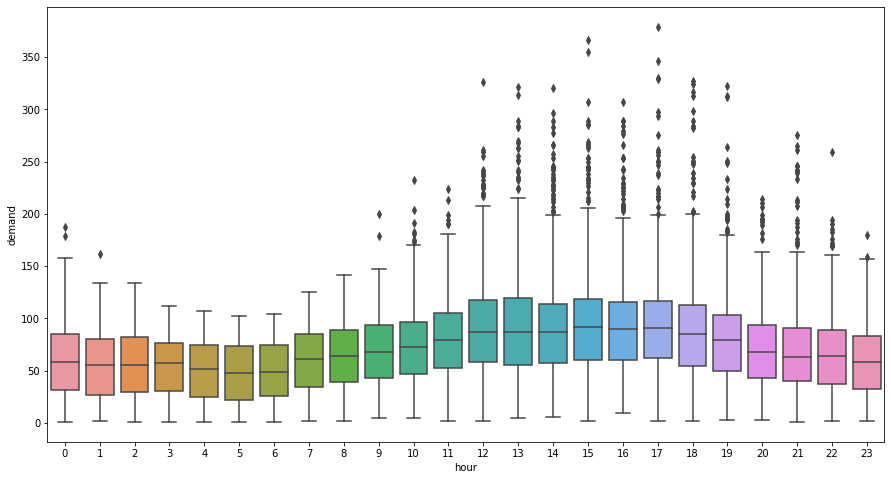

In [16]:
plt.figure(figsize=(15,8))
sns.boxplot(eda_df['hour'],eda_df['demand'])
plt.show()

In [17]:
eda_df.groupby('hour').demand.median().sort_values(ascending=False)

hour
15    92.0
17    91.0
16    90.0
14    87.5
12    87.0
13    87.0
18    85.0
19    79.0
11    79.0
10    73.0
20    68.0
9     67.5
22    64.0
8     64.0
21    63.5
7     61.0
0     58.0
23    58.0
3     57.0
1     56.0
2     56.0
4     52.0
6     49.0
5     48.0
Name: demand, dtype: float64

#### 15th hour has a highest demand , from 10 AM to 6 PM , demand is more than the rest hours of the day

In [18]:
eda_df.head()

,date,hour,demand,day,month,year
0,2018-08-18,9,91,18,8,2018
1,2018-08-18,10,21,18,8,2018
2,2018-08-18,13,23,18,8,2018
3,2018-08-18,14,104,18,8,2018
4,2018-08-18,15,81,18,8,2018


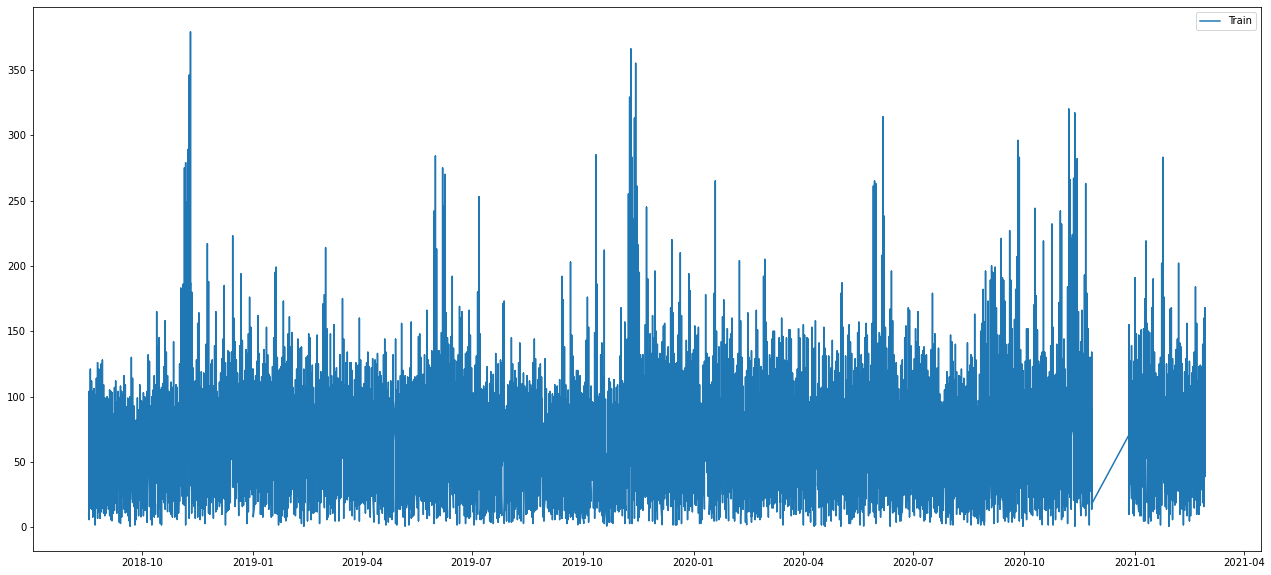

In [19]:
plt.figure(figsize=(22,10))

plt.plot(eda_df['date'], eda_df['demand'], label='Train')
plt.legend(loc='best')
plt.show()

### Finding and Handling Missing Dates

In [20]:
print('Total days between 18-08-18 to 28-02-21:', (eda_df['date'].max() - eda_df['date'].min()).days)
print('Number of rows present in the data are:', eda_df.shape[0])

Total days between 18-08-18 to 28-02-21: 925
Number of rows present in the data are: 18247


In [21]:
pd.date_range(start='2018-08-18',end='2021-02-28').difference(eda_df['date'])

DatetimeIndex(['2019-04-28', '2020-11-27', '2020-11-28', '2020-11-29',
               '2020-11-30', '2020-12-01', '2020-12-02', '2020-12-03',
               '2020-12-04', '2020-12-05', '2020-12-06', '2020-12-07',
               '2020-12-08', '2020-12-09', '2020-12-10', '2020-12-11',
               '2020-12-12', '2020-12-13', '2020-12-14', '2020-12-15',
               '2020-12-16', '2020-12-17', '2020-12-18', '2020-12-19',
               '2020-12-20', '2020-12-21', '2020-12-22', '2020-12-23',
               '2020-12-24', '2020-12-25', '2020-12-26'],
              dtype='datetime64[ns]', freq=None)

In [22]:
missing_days=pd.date_range(start='2018-08-18',end='2021-02-28').difference(eda_df['date'])

In [23]:
missing_days.shape

(31,)

#### There are 31 days missing 28-04-2019, 27-11-2020 to 26-12-2020

In [24]:
missing_dates=pd.DataFrame(data=missing_days,columns=['date'])

In [25]:
missing_dates.head()

,date
0,2019-04-28
1,2020-11-27
2,2020-11-28
3,2020-11-29
4,2020-11-30


In [26]:
missing_dates['day']=missing_dates['date'].dt.strftime("%A")
missing_dates['day_of_month']=missing_dates['date'].dt.day
missing_dates['month']=missing_dates['date'].dt.month
missing_dates['year']=missing_dates['date'].dt.year

In [27]:
missing_dates.head(10)

,date,day,day_of_month,month,year
0,2019-04-28,Sunday,28,4,2019
1,2020-11-27,Friday,27,11,2020
2,2020-11-28,Saturday,28,11,2020
3,2020-11-29,Sunday,29,11,2020
4,2020-11-30,Monday,30,11,2020
5,2020-12-01,Tuesday,1,12,2020
6,2020-12-02,Wednesday,2,12,2020
7,2020-12-03,Thursday,3,12,2020
8,2020-12-04,Friday,4,12,2020
9,2020-12-05,Saturday,5,12,2020


In [28]:
missing_dates['day'].value_counts()

Friday       5
Saturday     5
Sunday       5
Monday       4
Tuesday      4
Thursday     4
Wednesday    4
Name: day, dtype: int64

In [29]:
missing_dates['month'].value_counts()

12    26
11     4
4      1
Name: month, dtype: int64

In [30]:
missing_dates['year'].value_counts()

2020    30
2019     1
Name: year, dtype: int64

In [31]:
pd.crosstab(missing_dates['year'],missing_dates['day'])

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
year,,,,,,,
2019,0,0,0,1,0,0,0
2020,5,4,5,4,4,4,4


##### filling the missing values with previous day data for 28-04-2019
##### 27-11-2020 to 26-12-2020 - filling the data with previous month data

In [32]:
missing_data_28=eda_df[eda_df['date']=='2019-04-27']

In [33]:
# incrementing the datetime value with 1 day
missing_data_28['new_date']=missing_data_28['date']+datetime.timedelta(days=1)

In [34]:
missing_data_28=missing_data_28.reset_index(drop=True)

In [35]:
missing_data_28.drop(['date','day','month','year'],axis=1,inplace=True)

In [36]:
missing_data_28.head()

,hour,demand,new_date
0,0,92,2019-04-28
1,1,46,2019-04-28
2,2,13,2019-04-28
3,3,32,2019-04-28
4,5,37,2019-04-28


In [37]:
##### 27-11-2020 to 26-12-2020 - fill the data with previous month data
missing_data_27_nov_to_26_dec=eda_df[(eda_df['date']>='2020-10-27') & (eda_df['date']<='2020-11-26')]

In [38]:
missing_data_27_nov_to_26_dec.head()

,date,hour,demand,day,month,year
16147,2020-10-27,0,98,27,10,2020
16148,2020-10-27,1,67,27,10,2020
16149,2020-10-27,2,83,27,10,2020
16150,2020-10-27,4,61,27,10,2020
16151,2020-10-27,6,30,27,10,2020


In [39]:
missing_data_27_nov_to_26_dec['date'].unique()

array(['2020-10-27T00:00:00.000000000', '2020-10-28T00:00:00.000000000',
       '2020-10-29T00:00:00.000000000', '2020-10-30T00:00:00.000000000',
       '2020-10-31T00:00:00.000000000', '2020-11-01T00:00:00.000000000',
       '2020-11-02T00:00:00.000000000', '2020-11-03T00:00:00.000000000',
       '2020-11-04T00:00:00.000000000', '2020-11-05T00:00:00.000000000',
       '2020-11-06T00:00:00.000000000', '2020-11-07T00:00:00.000000000',
       '2020-11-08T00:00:00.000000000', '2020-11-09T00:00:00.000000000',
       '2020-11-10T00:00:00.000000000', '2020-11-11T00:00:00.000000000',
       '2020-11-12T00:00:00.000000000', '2020-11-13T00:00:00.000000000',
       '2020-11-14T00:00:00.000000000', '2020-11-15T00:00:00.000000000',
       '2020-11-16T00:00:00.000000000', '2020-11-17T00:00:00.000000000',
       '2020-11-18T00:00:00.000000000', '2020-11-19T00:00:00.000000000',
       '2020-11-20T00:00:00.000000000', '2020-11-21T00:00:00.000000000',
       '2020-11-22T00:00:00.000000000', '2020-11-23

In [40]:
missing_data_27_nov_to_26_dec['new_date']=missing_data_27_nov_to_26_dec['date']+datetime.timedelta(days=31)

In [41]:
missing_data_27_nov_to_26_dec['new_date'].unique()

array(['2020-11-27T00:00:00.000000000', '2020-11-28T00:00:00.000000000',
       '2020-11-29T00:00:00.000000000', '2020-11-30T00:00:00.000000000',
       '2020-12-01T00:00:00.000000000', '2020-12-02T00:00:00.000000000',
       '2020-12-03T00:00:00.000000000', '2020-12-04T00:00:00.000000000',
       '2020-12-05T00:00:00.000000000', '2020-12-06T00:00:00.000000000',
       '2020-12-07T00:00:00.000000000', '2020-12-08T00:00:00.000000000',
       '2020-12-09T00:00:00.000000000', '2020-12-10T00:00:00.000000000',
       '2020-12-11T00:00:00.000000000', '2020-12-12T00:00:00.000000000',
       '2020-12-13T00:00:00.000000000', '2020-12-14T00:00:00.000000000',
       '2020-12-15T00:00:00.000000000', '2020-12-16T00:00:00.000000000',
       '2020-12-17T00:00:00.000000000', '2020-12-18T00:00:00.000000000',
       '2020-12-19T00:00:00.000000000', '2020-12-20T00:00:00.000000000',
       '2020-12-21T00:00:00.000000000', '2020-12-22T00:00:00.000000000',
       '2020-12-23T00:00:00.000000000', '2020-12-24

In [42]:
missing_data_27_nov_to_26_dec.tail()

,date,hour,demand,day,month,year,new_date
16823,2020-11-26,19,94,26,11,2020,2020-12-27
16824,2020-11-26,20,77,26,11,2020,2020-12-27
16825,2020-11-26,21,35,26,11,2020,2020-12-27
16826,2020-11-26,22,15,26,11,2020,2020-12-27
16827,2020-11-26,23,18,26,11,2020,2020-12-27


##### removing an extra day at the end of missing_data_27_nov_to_26_dec, as 27-12-2020 data is already present in the dataset

In [43]:
# removing an extra day at the end of missing_data_27_nov_to_26_dec, as 27-12-2020 data is already present in the dataset
missing_data_27_nov_to_26_dec=missing_data_27_nov_to_26_dec[(missing_data_27_nov_to_26_dec['new_date']>='2020-11-27') & (missing_data_27_nov_to_26_dec['new_date']<='2020-12-26')]

In [44]:
missing_data_27_nov_to_26_dec

,date,hour,demand,day,month,year,new_date
16147,2020-10-27,0,98,27,10,2020,2020-11-27
16148,2020-10-27,1,67,27,10,2020,2020-11-27
16149,2020-10-27,2,83,27,10,2020,2020-11-27
16150,2020-10-27,4,61,27,10,2020,2020-11-27
16151,2020-10-27,6,30,27,10,2020,2020-11-27
...,...,...,...,...,...,...,...
16801,2020-11-25,19,103,25,11,2020,2020-12-26
16802,2020-11-25,20,82,25,11,2020,2020-12-26
16803,2020-11-25,21,92,25,11,2020,2020-12-26
16804,2020-11-25,22,37,25,11,2020,2020-12-26


In [45]:
missing_data_27_nov_to_26_dec=missing_data_27_nov_to_26_dec.reset_index(drop=True)

In [46]:
missing_data_27_nov_to_26_dec.drop(['date','day','month','year'],axis=1,inplace=True)

In [47]:
missing_data_final=pd.concat([missing_data_28,missing_data_27_nov_to_26_dec],axis=0).reset_index()

In [48]:
missing_data_final

,index,hour,demand,new_date
0,0,0,92,2019-04-28
1,1,1,46,2019-04-28
2,2,2,13,2019-04-28
3,3,3,32,2019-04-28
4,4,5,37,2019-04-28
...,...,...,...,...
676,654,19,103,2020-12-26
677,655,20,82,2020-12-26
678,656,21,92,2020-12-26
679,657,22,37,2020-12-26


In [49]:
missing_data_final.shape

(681, 4)

In [50]:
missing_data_final.drop('index',axis=1,inplace=True)

In [51]:
# bringing date column to the first column
column_to_move=missing_data_final.pop('new_date')
missing_data_final.insert(0,'date',column_to_move)

In [52]:
missing_data_final['day']=missing_data_final['date'].dt.day
missing_data_final['month']=missing_data_final['date'].dt.month
missing_data_final['year']=missing_data_final['date'].dt.year

In [53]:
eda_df=pd.concat([eda_df,missing_data_final],axis=0).reset_index(drop=True)

In [54]:
eda_df

,date,hour,demand,day,month,year
0,2018-08-18,9,91,18,8,2018
1,2018-08-18,10,21,18,8,2018
2,2018-08-18,13,23,18,8,2018
3,2018-08-18,14,104,18,8,2018
4,2018-08-18,15,81,18,8,2018
...,...,...,...,...,...,...
18923,2020-12-26,19,103,26,12,2020
18924,2020-12-26,20,82,26,12,2020
18925,2020-12-26,21,92,26,12,2020
18926,2020-12-26,22,37,26,12,2020


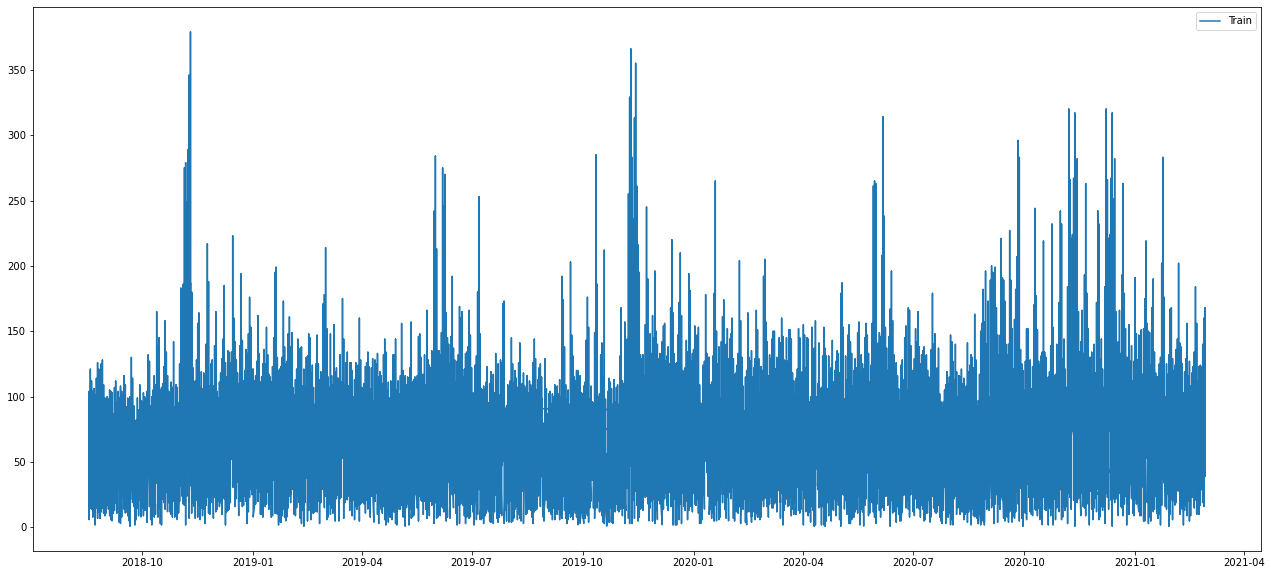

In [55]:
plt.figure(figsize=(22,10))

plt.plot(eda_df['date'], eda_df['demand'], label='Train')
plt.legend(loc='best')
plt.show()

In [56]:
# cross check whether any missing date is present or not
pd.date_range(start='2018-08-18',end='2021-02-28').difference(eda_df['date']).nunique()

0

##### No missing date present

In [57]:
train_data=copy.deepcopy(eda_df)

In [58]:
train_data.columns

Index(['date', 'hour', 'demand', 'day', 'month', 'year'], dtype='object')

In [59]:
# dropping day, month, year since these are not required in model building
train_data.drop(['day','month','year'],axis=1,inplace=True)

In [60]:
train_data

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81
...,...,...,...
18923,2020-12-26,19,103
18924,2020-12-26,20,82
18925,2020-12-26,21,92
18926,2020-12-26,22,37


In [61]:
# creating a date-time column, joining date and hour
new_df=train_data[['date','hour']].melt('date',)
new_df['date']=(pd.to_datetime(new_df['date'],dayfirst=True)+pd.to_timedelta(train_data['hour'].astype(int),unit='H'))

In [62]:
new_df.rename(columns={'date':'date_time'},inplace=True)

In [63]:
train_data=pd.concat([train_data,pd.Series(new_df['date_time'])],axis=1).reset_index()

In [64]:
train_data.columns

Index(['index', 'date', 'hour', 'demand', 'date_time'], dtype='object')

In [65]:
# creating a dataframe of date_time and demand to fit into the Prophet model
df=train_data[['date_time','demand']]

In [66]:
df.columns=['ds','y']

In [67]:
df

,ds,y
0,2018-08-18 09:00:00,91
1,2018-08-18 10:00:00,21
2,2018-08-18 13:00:00,23
3,2018-08-18 14:00:00,104
4,2018-08-18 15:00:00,81
...,...,...
18923,2020-12-26 19:00:00,103
18924,2020-12-26 20:00:00,82
18925,2020-12-26 21:00:00,92
18926,2020-12-26 22:00:00,37


### Predective Modelling
### FB-Prophet

In [68]:
#importing FbProphet algorithm
from fbprophet import Prophet

In [69]:
model=Prophet()

In [70]:
model.fit(df)

In [71]:
len(pd.date_range(start = '2021-03-01', end = '2022-03-28' ))

393

##### 393 days of future data to be predicted, so 393*24=9432 hours to be predicted

In [72]:
# making a future dataframe
future = model.make_future_dataframe(periods=9432, freq='H')

In [73]:
fcst=model.predict(future)

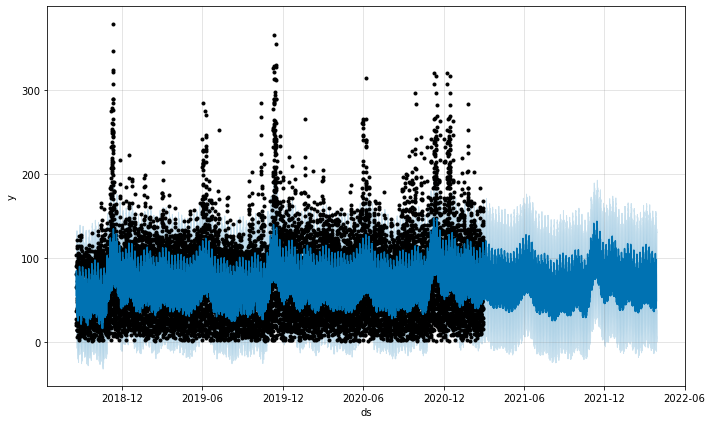

In [74]:
fig=model.plot(fcst)

In [75]:
fcst

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-08-18 09:00:00,57.307652,11.513471,104.634020,57.307652,57.307652,-1.764159,-1.764159,-1.764159,-1.985993,...,11.568220,11.568220,11.568220,-11.346386,-11.346386,-11.346386,0.0,0.0,0.0,55.543493
1,2018-08-18 10:00:00,57.310238,13.556172,109.682710,57.310238,57.310238,5.468945,5.468945,5.468945,4.810876,...,11.966293,11.966293,11.966293,-11.308224,-11.308224,-11.308224,0.0,0.0,0.0,62.779183
2,2018-08-18 13:00:00,57.317994,33.356488,126.004441,57.317994,57.317994,24.603740,24.603740,24.603740,22.834910,...,12.962797,12.962797,12.962797,-11.193967,-11.193967,-11.193967,0.0,0.0,0.0,81.921734
3,2018-08-18 14:00:00,57.320579,35.519128,132.321889,57.320579,57.320579,27.004376,27.004376,27.004376,24.938978,...,13.221360,13.221360,13.221360,-11.155963,-11.155963,-11.155963,0.0,0.0,0.0,84.324955
4,2018-08-18 15:00:00,57.323164,36.090483,132.250238,57.323164,57.323164,27.754222,27.754222,27.754222,25.432475,...,13.439749,13.439749,13.439749,-11.118002,-11.118002,-11.118002,0.0,0.0,0.0,85.077387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28355,2022-03-28 19:00:00,70.802560,21.286870,121.147796,61.521585,79.733635,0.749722,0.749722,0.749722,10.629182,...,-5.670459,-5.670459,-5.670459,-4.209001,-4.209001,-4.209001,0.0,0.0,0.0,71.552282
28356,2022-03-28 20:00:00,70.802056,15.362783,111.232528,61.520264,79.734547,-7.448820,-7.448820,-7.448820,2.515533,...,-5.759103,-5.759103,-5.759103,-4.205250,-4.205250,-4.205250,0.0,0.0,0.0,63.353237
28357,2022-03-28 21:00:00,70.801553,5.454946,106.251079,61.518943,79.735414,-14.464218,-14.464218,-14.464218,-4.431880,...,-5.830932,-5.830932,-5.830932,-4.201407,-4.201407,-4.201407,0.0,0.0,0.0,56.337335
28358,2022-03-28 22:00:00,70.801049,6.760741,101.088618,61.517622,79.736280,-18.956503,-18.956503,-18.956503,-8.871408,...,-5.887623,-5.887623,-5.887623,-4.197473,-4.197473,-4.197473,0.0,0.0,0.0,51.844546


In [76]:
fcst.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

### 'yhat' is the predicted variable

#### future data is from index 18928 to last index of the dataframe

In [77]:
forecast_df=fcst[['ds','yhat']][18928:]

In [78]:
forecast_df

,ds,yhat
18928,2021-03-01 00:00:00,67.783744
18929,2021-03-01 01:00:00,63.979325
18930,2021-03-01 02:00:00,59.352700
18931,2021-03-01 03:00:00,55.645793
18932,2021-03-01 04:00:00,54.590364
...,...,...
28355,2022-03-28 19:00:00,71.552282
28356,2022-03-28 20:00:00,63.353237
28357,2022-03-28 21:00:00,56.337335
28358,2022-03-28 22:00:00,51.844546


In [79]:
forecast_df=forecast_df.reset_index(drop=True)

In [80]:
forecast_df

,ds,yhat
0,2021-03-01 00:00:00,67.783744
1,2021-03-01 01:00:00,63.979325
2,2021-03-01 02:00:00,59.352700
3,2021-03-01 03:00:00,55.645793
4,2021-03-01 04:00:00,54.590364
...,...,...
9427,2022-03-28 19:00:00,71.552282
9428,2022-03-28 20:00:00,63.353237
9429,2022-03-28 21:00:00,56.337335
9430,2022-03-28 22:00:00,51.844546


#### test data has been predicted but some hours are missing in the test_data, so merging only the common hours

In [81]:
trans_valid_data=valid_data[['date','hour']].melt('date',)
trans_valid_data['date']=(pd.to_datetime(trans_valid_data['date'],dayfirst=True)+pd.to_timedelta(valid_data['hour'].astype(int),unit='H'))

In [82]:
trans_valid_data.rename(columns={'date':'ds'},inplace=True)

In [83]:
valid_data=pd.concat([valid_data,pd.Series(trans_valid_data['ds'])],axis=1).reset_index()

In [84]:
valid_data

,index,date,hour,ds
0,0,2021-03-01,0,2021-03-01 00:00:00
1,1,2021-03-01,1,2021-03-01 01:00:00
2,2,2021-03-01,2,2021-03-01 02:00:00
3,3,2021-03-01,3,2021-03-01 03:00:00
4,4,2021-03-01,5,2021-03-01 05:00:00
...,...,...,...,...
7645,7645,2022-03-28,19,2022-03-28 19:00:00
7646,7646,2022-03-28,20,2022-03-28 20:00:00
7647,7647,2022-03-28,21,2022-03-28 21:00:00
7648,7648,2022-03-28,22,2022-03-28 22:00:00


In [85]:
valid_data.drop('index',axis=1,inplace=True)

In [86]:
valid_data.head()

,date,hour,ds
0,2021-03-01,0,2021-03-01 00:00:00
1,2021-03-01,1,2021-03-01 01:00:00
2,2021-03-01,2,2021-03-01 02:00:00
3,2021-03-01,3,2021-03-01 03:00:00
4,2021-03-01,5,2021-03-01 05:00:00


In [87]:
valid_data=pd.merge(valid_data,forecast_df,on='ds')

In [88]:
valid_data.drop('ds',axis=1,inplace=True)

In [89]:
valid_data.rename(columns={'yhat':'demand'},inplace=True)

In [90]:
valid_data.columns

Index(['date', 'hour', 'demand'], dtype='object')

In [91]:
valid_data

,date,hour,demand
0,2021-03-01,0,67.783744
1,2021-03-01,1,63.979325
2,2021-03-01,2,59.352700
3,2021-03-01,3,55.645793
4,2021-03-01,5,56.552081
...,...,...,...
7645,2022-03-28,19,71.552282
7646,2022-03-28,20,63.353237
7647,2022-03-28,21,56.337335
7648,2022-03-28,22,51.844546


In [92]:
# rounding the predicted demand
valid_data['demand']=valid_data['demand'].apply(lambda x: round(x))

In [93]:
valid_data.to_csv('submission_final.csv',index=False)